In [1]:
import requests
from bs4 import BeautifulSoup
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='http://finance.naver.com/sise/sise_index_day.nhn?code=KPI200'

In [12]:
date=[]
close=[]

for i in range(557):
    param={'page':i}
    result=requests.get(url,param)

    soup=BeautifulSoup(result.content,'lxml')
    
    date_tag=soup.select('td.date') 
    #d = soup.find_all('td', class_='date')    find all은 list 반환
    t_close=soup.select('td.number_1')
 
    for d in date_tag:
        d_t=d.text
        dates=dt.datetime.strptime(d_t,"%Y.%m.%d").date()
        date.append(dates)
        
    
    for a in range(len(t_close)):
        if a %4==0:
            close.append(float(t_close[a].text))
            
#prices=soup.find_all('td',class_='number_1')
#def date_format(d):
#    d=str(d).replace('-','.')
#    yyyy=int(d.split('.')[0])
#    mm=int(d.split('.')[1])
#    dd=int(d.split('.')[2])
    
#    t_date=dt.date(yyyy,mm,dd)
#    return t_date

In [13]:
DF=pd.DataFrame(close, index=date, columns =['close'])

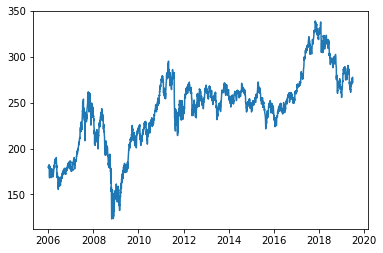

In [14]:
plt.plot(DF)
plt.show()